# MatPlotLib Playground

In [10]:
import sys
!{sys.executable} -m pip install matplotlib

You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.9_1/libexec/bin/python -m pip install --upgrade pip' command.


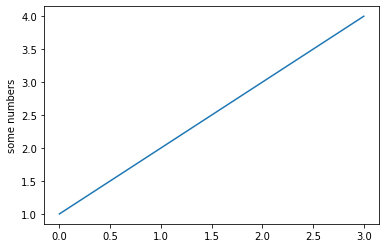

In [114]:
import matplotlib.pyplot as plt
import math
import pandas as pd
import numpy as np

plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()


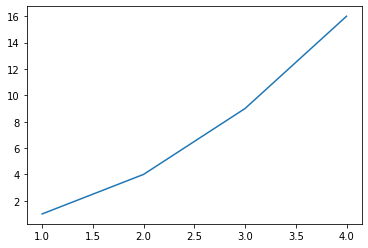

In [6]:
# plot x versus y
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.show()

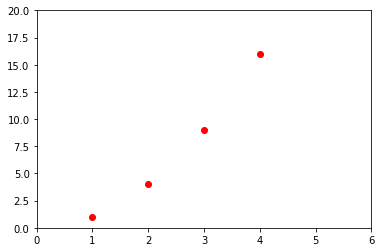

In [8]:
# Plot Formatting
# Example format strings
# 'b' blue markers with default shape
# 'ro' red circles
# 'g-' green solid line
# '--' dashed line with default color
# 'k^:' black triangle_up markers connected by a dotted line

plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
plt.axis((0, 6, 0, 20)) # xmin, xmax, ymin, ymax
plt.show()

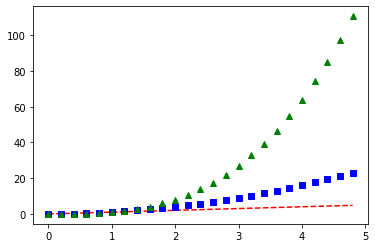

In [11]:
#Plot NumPy Array
t = np.arange(0, 5, 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--',
         t, t**2, 'bs',
         t, t**3, 'g^')
plt.show()

# Curves

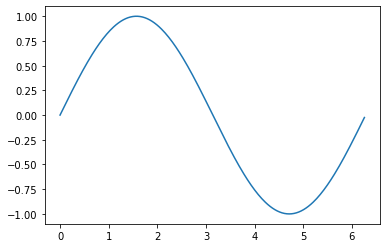

In [15]:
#Curve Plotting

n = 256
x,y = [], []

for i in range(n):
    x.append(2*math.pi*i/n)
    y.append(math.sin(x[-1]))

plt.plot(x,y)
plt.show()

In [18]:
#Create Pandas DataFrame from the available points array
df = pd.DataFrame({'x':x,'y':y})
df.head(2)

,x,y
0,0.000000,0.000000
1,0.024544,0.024541


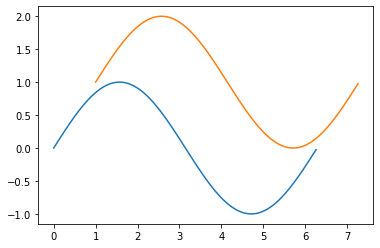

In [19]:
#Multiple curves in the same graph

df['x2'] = df['x'] + 1
df['y2'] = df['y'] + 1

plt.plot(df['x'],df['y'])
plt.plot(df['x2'],df['y2'])
plt.show()

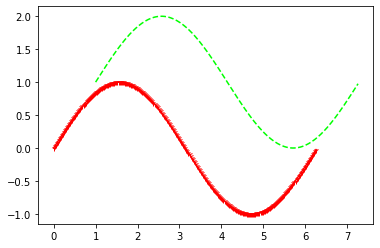

In [20]:
# Customized Curves
plt.plot(df['x'],df['y'],c='#ff0000',marker='1')
plt.plot(df['x2'],df['y2'],c='#00ff00',linestyle='--')
plt.show()

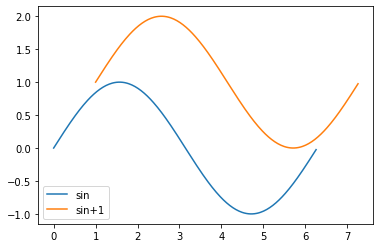

In [22]:
# Add Graph Legend
plt.plot(df['x'],df['y'],label='sin')
plt.plot(df['x2'],df['y2'],label='sin+1')
plt.legend(loc='lower left')
plt.show()

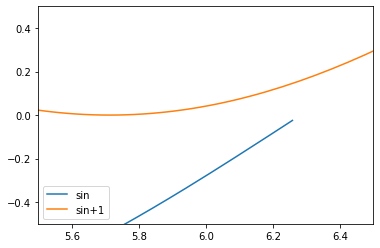

In [24]:
#Axis Zoom

plt.xlim(5.5,6.5)
plt.ylim(-0.5,0.5)
plt.plot(df['x'],df['y'],label='sin')
plt.plot(df['x2'],df['y2'],label='sin+1')
plt.legend(loc='lower left')
plt.show()

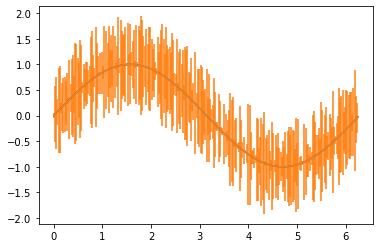

In [25]:
# Error Bars

df['yerr'] = np.random.rand(256)
plt.plot(df['x'],df['y'])
plt.errorbar(df['x'],df['y'],yerr = df['yerr'])
plt.show()

# Scattered Plots

In [104]:
#Read Example data plot
df = pd.read_csv('data/index_output_voltage.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  328 non-null    int64  
 1   Voltage   328 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 5.2 KB


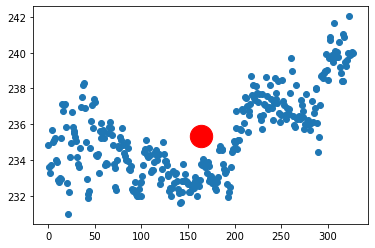

In [105]:
#Definine Scattered Plot
plt.scatter(df['datetime'],df['Voltage'])
plt.scatter(df['datetime'].mean(),df['Voltage'].mean(),c='#ff0000',s=500)
plt.show()

# Boxplot

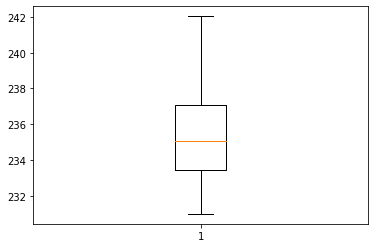

In [106]:
#Boxplot Example 

plt.boxplot(df['Voltage'])
plt.show()

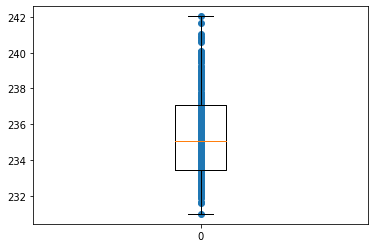

In [107]:
#Combined Graphs
plt.scatter([0]*df.shape[0],df['Voltage'])
plt.boxplot(df['Voltage'],positions=[0])
plt.show()

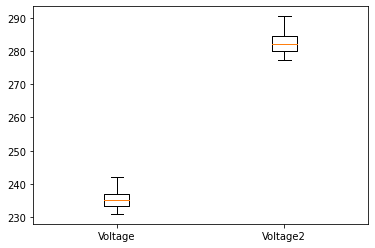

In [110]:
# Multiple boxplot
plt.boxplot([df['Voltage'],df['Voltage']*1.2])
plt.xticks([1,2],['Voltage','Voltage2'])
plt.show()

# Bar Graphs

In [111]:
#Read Demo Sensor Data
df = pd.read_json('data/demo_multi_sensor_data.json', lines=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   device_id  20 non-null     object        
 1   type       20 non-null     object        
 2   value      20 non-null     float64       
 3   timestamp  20 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 768.0+ bytes


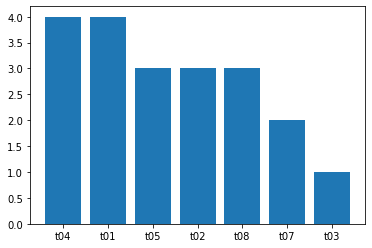

In [112]:
#Count values
cc = df['device_id'].value_counts()

plt.xticks(range(len(cc)),cc.index)
plt.bar(range(len(cc)),cc)
plt.show()

# Histograms

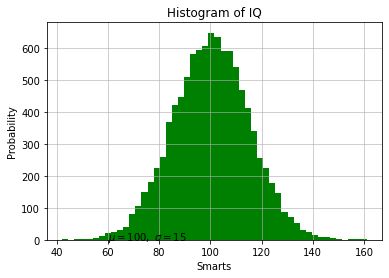

In [69]:
#Histogram and text
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# histogram of data, with 50 “bins”
plt.hist(x, 50, facecolor='g')

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.grid(True, alpha=0.75)
plt.show()

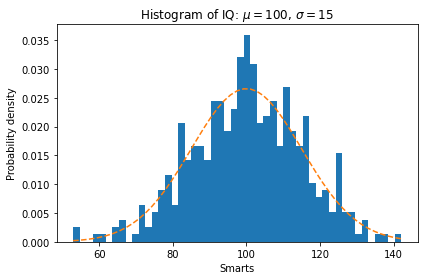

In [98]:
np.random.seed(19680801)

# example data
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(437)

num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=True)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

# Multiple Graphs

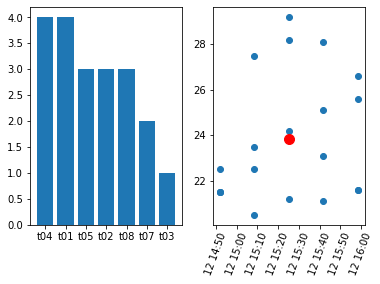

In [97]:
plt.subplot(1,2,1)

#Reuse the previous available data cc
plt.xticks(range(len(cc)),cc.index)
plt.bar(range(len(cc)),cc)

plt.subplot(1,2,2)

plt.scatter(df['timestamp'],df['value'])
plt.scatter(df['timestamp'].mean(),df['value'].mean(),c='#ff0000',s=100)
plt.xticks(rotation=70)
plt.show()

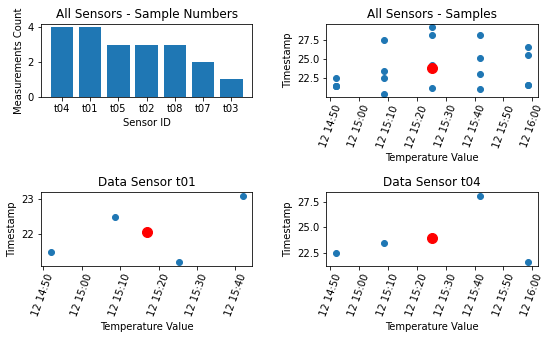

In [96]:
#Extract data only for sensor t01 and t04
is_t01 =  df['device_id']=='t01'
sensor_t01_df = df[is_t01]

is_t04 =  df['device_id']=='t04'
sensor_t04_df = df[is_t04]

#Plot 4 graphs in a 2x2 grid
f1 = plt.subplot(2,2,1)
f1.title.set_text('All Sensors - Sample Numbers')
f1.set_xlabel('Sensor ID')
f1.set_ylabel('Measurements Count')
plt.xticks(range(len(cc)),cc.index)
plt.bar(range(len(cc)),cc)

f2 = plt.subplot(2,2,2)
f2.title.set_text('All Sensors - Samples')
f2.set_xlabel('Temperature Value')
f2.set_ylabel('Timestamp')
plt.scatter(df['timestamp'],df['value'])
plt.scatter(df['timestamp'].mean(),df['value'].mean(),c='#ff0000',s=100)
plt.xticks(rotation=70)

f3 = plt.subplot(2,2,3)
f3.title.set_text('Data Sensor t01')
f3.set_xlabel('Temperature Value')
f3.set_ylabel('Timestamp')
plt.scatter(sensor_t01_df['timestamp'],sensor_t01_df['value'])
plt.scatter(sensor_t01_df['timestamp'].mean(),sensor_t01_df['value'].mean(),c='#ff0000',s=100)
plt.xticks(rotation=70)

f4= plt.subplot(2,2,4)
f4.title.set_text('Data Sensor t04')
f4.set_xlabel('Temperature Value')
f4.set_ylabel('Timestamp')
plt.scatter(sensor_t04_df['timestamp'],sensor_t04_df['value'])
plt.scatter(sensor_t04_df['timestamp'].mean(),sensor_t04_df['value'].mean(),c='#ff0000',s=100)
plt.xticks(rotation=70)

# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=1.25, hspace=1.3, wspace=0.35)
plt.show()